# Part 1: What is a Probability Mass Function?
To fully grasp the concept of a PMF, let's first revisit the distinction between discrete and continuous variables.

Discrete Variables: These are variables that can only take on a finite or countably infinite number of values. There are distinct, separate "steps" between possible outcomes. Examples include:


- The outcome of a dice roll (1, 2, 3, 4, 5, 6)

- The number of heads in 10 coin flips (0, 1, 2, ..., 10)

- The number of students in a classroom (0, 1, 2, ...)

- A rating on a scale of 1 to 5

1. The Role of the PMF: For a discrete variable, we can ask about the probability of a specific, exact outcome. The PMF is the function that provides this probability. It maps each possible outcome of a random variable to its probability.

2. Formal Definition: Let X be a discrete random variable. The probability mass function, denoted by P(x), is a function that gives the probability of the random variable X being equal to a specific value x. We can write this as:



P(x)=P(X=x)
The Two Rules of a PMF: For a function to be a valid PMF, it must satisfy two conditions:

- The probability for any given value must be between 0 and 1: 0
leP(x)
le1 for all possible values of x.

- The sum of all probabilities for all possible outcomes must equal 1: 
sum_xP(x)=1. This ensures that the total probability of all possible events is 100%.

Think of a PMF as a table or a bar chart where each bar represents a possible outcome, and the height of the bar is the probability of that outcome occurring.

# Part 2: Why We Use PMFs in Data Science
Just like PDFs, PMFs are not just theoretical constructs. They are a foundational tool for working with categorical and count-based data in data science. Here's why they are so crucial:

- Modeling and Summarizing Discrete Data: Many datasets in data science are discrete. For example, customer satisfaction scores (1-5), the number of clicks on a button, or the classification of an email (spam/not spam). PMFs provide a compact way to describe the distribution of this data. By calculating the PMF from our data, we can understand the frequency and likelihood of each possible outcome.

- Statistical Inference for Categorical Data: When we want to perform hypothesis testing on discrete data, PMFs are essential. For example, a Chi-squared test for independence relies on understanding the expected frequencies (which are derived from probabilities) to determine if observed frequencies are statistically significant. The PMF provides the theoretical framework for these expected values.

- Bayesian Classification: A classic example of PMF usage is the Naive Bayes classifier. This algorithm uses the joint probability of features and classes to make predictions. These probabilities are often calculated as PMFs (or approximated with them) from the training data. For example, it might calculate the probability that a certain word appears in a spam email versus a non-spam email.

- Simulation and Generative Models: If we have a PMF for a particular process, we can use it to simulate data that follows the same distribution. This is valuable for:

- Monte Carlo simulations: Generating random outcomes to model complex systems.

- Generative AI: Building models that can produce new data points that are similar to the training data.

Understanding and Predicting Count Data: Many real-world problems involve predicting the number of events that will occur. For example, the number of support tickets a company receives in an hour, or the number of items a customer will purchase. Distributions like the Poisson or Binomial distributions, which are defined by their PMFs, are specifically designed to model this kind of count data.

# Part 3: Python Examples
Let's illustrate these concepts with Python. We'll again use NumPy, Matplotlib, and SciPy to show how to work with PMFs.

Example 1: The PMF of a Fair Six-Sided Die

This is the simplest example of a PMF. The probability of rolling any specific number is 1/6.

The PMF of a fair six-sided die:
1    0.166667
2    0.166667
3    0.166667
4    0.166667
5    0.166667
6    0.166667
dtype: float64


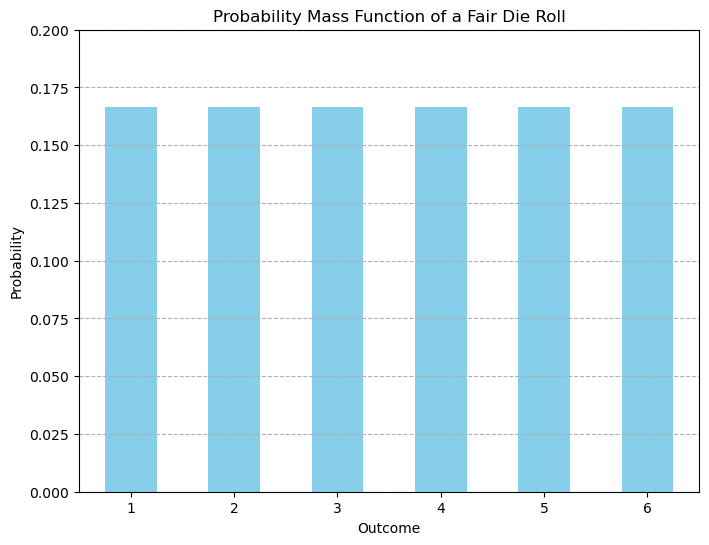

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the outcomes and their probabilities
outcomes = [1, 2, 3, 4, 5, 6]
probabilities = [1/6] * 6

# Create a PMF using a dictionary or a Pandas Series
pmf = pd.Series(probabilities, index=outcomes)

print("The PMF of a fair six-sided die:")
print(pmf)

# Visualize the PMF as a bar chart
plt.figure(figsize=(8, 6))
pmf.plot(kind='bar', color='skyblue')
plt.title('Probability Mass Function of a Fair Die Roll')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.ylim(0, 0.2)
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=0)
plt.show()

#### The binomial distribution models the number of successes in a fixed number of independent trials. Let's model the number of heads in 10 coin flips, where the probability of heads is 0.5.



PMF for the number of heads in 10 coin flips:
    Number of Heads  Probability
0                 0     0.000977
1                 1     0.009766
2                 2     0.043945
3                 3     0.117188
4                 4     0.205078
5                 5     0.246094
6                 6     0.205078
7                 7     0.117187
8                 8     0.043945
9                 9     0.009766
10               10     0.000977


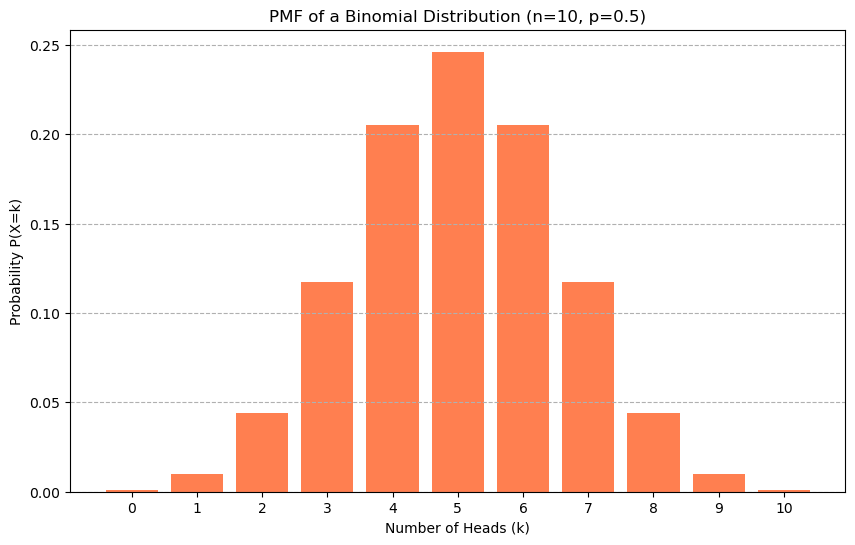

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Define the parameters
n = 10  # Number of trials (coin flips)
p = 0.5 # Probability of success (heads)

# Get all possible number of successes
k = np.arange(0, n + 1)

# Calculate the PMF for each possible outcome
pmf_values = binom.pmf(k, n, p)

# Create a DataFrame for clarity
pmf_df = pd.DataFrame({'Number of Heads': k, 'Probability': pmf_values})
print("PMF for the number of heads in 10 coin flips:")
print(pmf_df)

# Plot the PMF
plt.figure(figsize=(10, 6))
plt.bar(k, pmf_values, color='coral')
plt.title('PMF of a Binomial Distribution (n=10, p=0.5)')
plt.xlabel('Number of Heads (k)')
plt.ylabel('Probability P(X=k)')
plt.xticks(k)
plt.grid(axis='y', linestyle='--')
plt.show()

#### We can use the PMF to calculate the probability of a range of outcomes. For example, what is the probability of getting 3, 4, or 5 heads in 10 flips?



In [3]:
import numpy as np
from scipy.stats import binom

n = 10
p = 0.5

# Calculate the PMF values for k=3, 4, and 5
prob_3 = binom.pmf(3, n, p)
prob_4 = binom.pmf(4, n, p)
prob_5 = binom.pmf(5, n, p)

# The total probability is the sum of these individual probabilities
probability_range = prob_3 + prob_4 + prob_5

print(f"P(X=3) = {prob_3:.4f}")
print(f"P(X=4) = {prob_4:.4f}")
print(f"P(X=5) = {prob_5:.4f}")
print(f"The probability of getting 3, 4, or 5 heads is: {probability_range:.4f}")

# Alternatively, using the Cumulative Distribution Function (CDF)
# P(3 <= X <= 5) = P(X <= 5) - P(X <= 2)
cdf_5 = binom.cdf(5, n, p)
cdf_2 = binom.cdf(2, n, p)
probability_range_cdf = cdf_5 - cdf_2
print(f"The same probability calculated using the CDF is: {probability_range_cdf:.4f}")

P(X=3) = 0.1172
P(X=4) = 0.2051
P(X=5) = 0.2461
The probability of getting 3, 4, or 5 heads is: 0.5684
The same probability calculated using the CDF is: 0.5684
